<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# TimML Notebook 2
## A system with wells, rivers, and recharge
*Developed by Mark Bakker*

Consider a system of three aquifers. The aquifer parameters are presented in Table 1; note that an average thickness is specified for the top unconfined aquifer. A river with three branches cuts through the upper aquifer. The river is modeled with 7 head-specified line-sinks and each branch is modeled with 5 line-sinks. The Northern branch is modeled with resistance line-sinks with a resistance $c$ of 5 days and a width $w$ of 10 meters. The heads are specified at the centers of the line-sinks and are shown in Figure 1. 

Three wells are present. Well 1 is screened in aquifer 0 and has a discharge of 1000 m$^3$/d, well 2 is screened in aquifer 2 and has a discharge of 5000 m$^3$/d, and well 3 is screened in aquifers 1 and 2 and has a total discharge of 5000 m$^3$/d. A constant recharge through the upper boundary of aquifer 0 is simulated by one large circular infiltration area that covers the entire model area; the recharge rate is 0.2 mm/day. A head of 175 m is specified in layer 0 at the upper righthand corner of the model domain. A layout of all analytic elements, except the boundary of the infiltration area, is shown in Figure 1. 

#### Table 1: Aquifer data
|             | $k$ (m/d) | $z_b$ (m) | $z_t$ | $c$ (days) | $n$ (-) | $n_{ll}$ (-) |
|------------:|----------:|----------:|------:|-----------:|--------:|----------:|
|Aquifer 0    |   2       |   140     | 165   |            |  0.3    |           | 
|Leaky Layer 1|           |   120     | 140   |    2000    |         |   0.2     |    
|Aquifer 1    |   6       |   80      | 120   |            |  0.25   |           |  
|Leaky Layer 2|           |   60      | 80    |    20000   |         |   0.25    |  
|Aquifer 2    |   4       |   0       | 60    |            |  0.3    |           ||

<img src="layout_notebook2.png"> </img>

#### Figure 1: Layout of elements. Heads at centers of line-sinks are indicated. 

Import `timml`, `pylab`, and specify figures to be in the notebook.

In [1]:
from timml import *
from pylab import *
%matplotlib notebook

Define model and call it `ml`, add the constant, area-sink, wells, and line-sinks. Solve the model.

In [2]:
# Create basic model elements
ml = Model(k=[2, 6, 4],
           zb=[140, 80, 0],
           zt=[165, 120, 60],
           c=[2000, 20000],
           n=[0.3, 0.25, 0.3],
           nll=[0.2, 0.25])
rf = Constant(ml, xr=20000, yr=20000, head=175, layer=0)
p = CircAreaSink(ml, xp=10000, yp=10000, Rp=15000, infil=0.0002, layer=0)
w1 = Well(ml, xw=10000, yw=8000, Qw=1000, rw=0.3, layers=0, label='well 1')
w2 = Well(ml, xw=12100, yw=10700, Qw=5000, rw=0.3, layers=2, label='well 2')
w3 = Well(ml, xw=10000, yw=4600, Qw=5000, rw=0.3, layers=[1,2], label='maq well')
#
HeadLineSink(ml, x1=9510, y1=19466, x2=12620, y2=17376, head=170, layers=0)
HeadLineSink(ml, 12620, 17376, 12753, 14976, 168, [0])
HeadLineSink(ml, 12753, 14976, 13020, 12176, 166, [0])
HeadLineSink(ml, 13020, 12176, 15066, 9466,  164, [0])
HeadLineSink(ml, 15066, 9466,  16443, 7910,  162, [0])
HeadLineSink(ml, 16443, 7910,  17510, 5286,  160, [0])
HeadLineSink(ml, 17510, 5286,  17600, 976,   158, [0])
#
HeadLineSink(ml, 356,   6976,  4043,  7153, 174, [0])
HeadLineSink(ml, 4043,  7153,  6176,  8400, 171, [0])
HeadLineSink(ml, 6176,  8400,  9286,  9820, 168, [0])
HeadLineSink(ml, 9286,  9820,  12266, 9686, 166, [0])
HeadLineSink(ml, 12266, 9686,  15066, 9466, 164, [0])
#
HeadLineSink(ml, 1376,  1910,  4176,  2043, 170, [0])
HeadLineSink(ml, 4176,  2043,  6800,  1553, 166, [0])
HeadLineSink(ml, 6800,  1553,  9953,  2086, 162, [0])
HeadLineSink(ml, 9953,  2086,  14043, 2043, 160, [0])
HeadLineSink(ml, 14043, 2043,  17600, 976 , 158, [0])
#
ResLineSink(ml, x1=12753, y1=14976, x2=10781, y2=14895, head=168, res=5, width=10, layers=[0])
ResLineSink(ml, 10781, 14895, 8385,  15677, 170, 5, 10, [0])
ResLineSink(ml,  8385, 15677, 6094,  15885, 172, 5, 10, [0])
ResLineSink(ml,  6094, 15885, 3229,  14843, 174, 5, 10, [0])
ls = ResLineSink(ml,  3229, 14843,  833,  14261, 176, 5, 10, [0])
ml.solve()

Starting solve
Number of elements:  27
Percent progress:  0 10 20 30 40 50 60 70 80 90 100  
size of matrix (25, 25)
Solution complete


Create a contour plot.

<IPython.core.display.Javascript object>


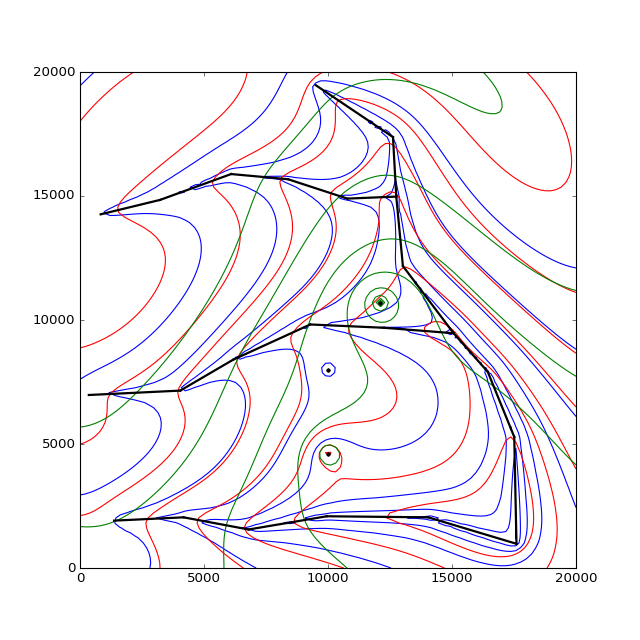

grid of (100, 100). gridding in progress. hit ctrl-c to abort
done with contouring
done with contouring
done with contouring


In [3]:
timlayout(ml, width=2)  # to make wider lines
timcontour(ml, 0, 20000, 100, 0, 20000, 100, 3, levels=10, newfig=False, width=1, size=(6,6))

Note that the last line-sink was given a name (`ls`). Check the head at the center of this line-sink. Does the
resistance of the bottom have a big effect?

In [4]:
print 'the head at the center of ResLineSink ls is:', ml.head(0, ls.xcp, ls.ycp)
print 'the head in the river is specified as:', 176

the head at the center of ResLineSink ls is: 176.310578099
the head in the river is specified as: 176


The heads at the three wells are as follows. Note that well 3 is screened in two aquifer (layers 1 and 2) so that the head in layers 1 and 2 are equal (the top layer is number 0). The discharge of the wells is stored in the `parameters` attribute. For wells 1 and 2 they are the specifid discharges. For well 3 they are the discharge in layer 1 and 2, respectively, which sums up to the specified discharge.

In [5]:
print 'The head at well 1 is:', ml.headVector(w1.xw, w1.yw)
print 'The head at well 2 is:', ml.headVector(w2.xw, w2.yw)
print 'The head at well 3 is:', ml.headVector(w3.xw, w3.yw)
print 'The discharge of well 1 is:', w1.parameters
print 'The discharge of well 2 is:', w2.parameters
print 'The discharge of well 3 is:', w3.parameters

The head at well 1 is: [ 146.64926901  168.5437178   168.61940564]
The head at well 2 is: [ 168.08176169  167.74139375  139.58008204]
The head at well 3 is: [ 166.07750996  153.65807146  153.65807146]
The discharge of well 1 is: [[ 1000.]]
The discharge of well 2 is: [[ 5000.]]
The discharge of well 3 is: [[ 2607.88508609]
 [ 2392.11491391]]


A contour plot is created including a cross-section (`xsec=True`).
50-year capture zones are computred for all three wells.

grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


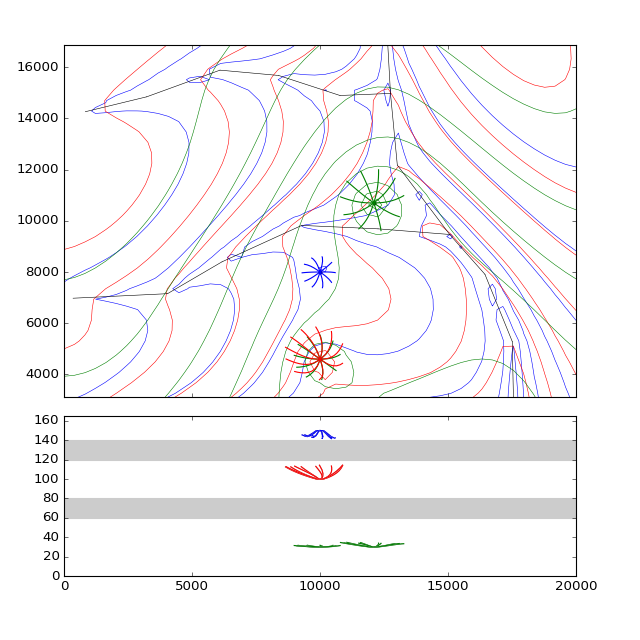

done with contouring
done with contouring
done with contouring
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax
reached tmax


In [6]:
# Create a contour plot for the area
timcontour(ml, 0, 20000, 50, 0, 20000, 50, 3, levels=10, xsec=True, size=(8,8))

# Capture zone is not working in Ipython Notebook yet!
capturezone(ml, w=w1, N=10, z=150, tmax=50*365.25, xsec=True)
capturezone(ml, w=w2, N=10, z=30, tmax=50*365.25, xsec=True)
capturezone(ml, w=w3, N=10, z=30, tmax=50*365.25, xsec=True)
capturezone(ml, w=w3, N=10, z=100, tmax=50*365.25, xsec=True)